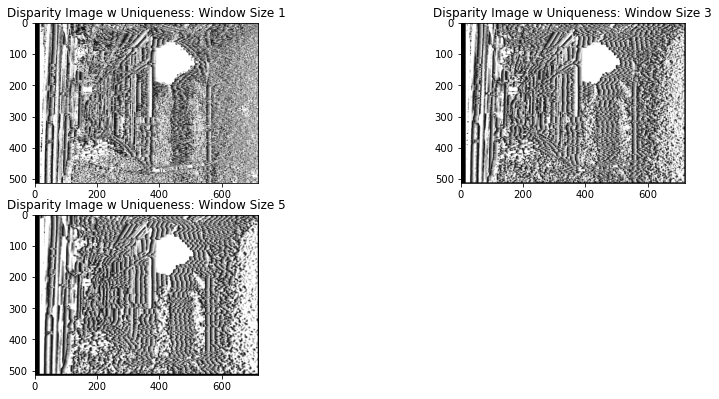

In [48]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function definition disparitySSDUniq
def disparitySSDUniq(leftImg, rightImg, winSize, maxSearchBound):
    
    # Gaussian Blurring for winSize > 1
    if (winSize > 1):
        leftImg = cv2.GaussianBlur(leftImg, (winSize, winSize), 0)
        rightImg = cv2.GaussianBlur(rightImg, (winSize, winSize), 0)
        
    # Converting image type to double
    leftImg = np.double(leftImg)
    rightImg = np.double(rightImg)   
    
    # Initialization of output images with and w/o uniqeness constraint
    outImg = np.zeros(leftImg.shape)
    outImgUniq = np.zeros(leftImg.shape)
    
    # Left Image pixel matching
    for row in range(leftImg.shape[0] - (winSize-1)):
        for col in range(leftImg.shape[1]-(winSize-1)):
            matLeft = leftImg[row:row+winSize, col:col+winSize]
            disparityList = []
            if col - maxSearchBound >= 0:
                # Right Image pixel matching with maxSearchBound at Epipolar Lines
                for disparityRange in range(maxSearchBound):
                    matRight = rightImg[row:row+(winSize), col-disparityRange:col-disparityRange+(winSize)]
                    SD = (matRight - matLeft)**2
                    SSD = np.sum(SD)
                    disparityList.append(SSD)

                # Uniqueness constraint with flags 
                flag = 0
                while flag == 0:
                    
                    if len(disparityList) == 0:
                        minDispVal = 0
                    else:
                        minDispVal = min(disparityList)
                        
                    if outImgUniq[row, col-disparityList.index(minDispVal)] == 0:
                        minDispIndex = disparityList.index(minDispVal)
                        flag = 1
                    else:
                        disparityList.remove(minDispVal)

                # Using unique disparity values
                for i in range(len(disparityList)):
                    outImgUniq[row, col] = i
            else:
                pass
    
    # Normalization of pixel values
    outImgUniq = 255 * outImgUniq/(np.max(outImgUniq))
    outImgUniq = np.uint8(outImgUniq)
    
    return outImgUniq
    
# Reading Images
leftImg = cv2.imread('frameLeftgray.png', 0)
rightImg = cv2.imread('frameRightgray.png', 0)
builtinImg = cv2.imread('disparityMap_Matlab.png',0)

# Maximum Search Position on Epipolar Lines
maxSearchBound = 15

# Calling disparitySSDUniq function for window sizes 1, 3, and 5
outImgUniq1 = disparitySSDUniq(leftImg, rightImg, 1, maxSearchBound)
outImgUniq3 = disparitySSDUniq(leftImg, rightImg, 3, maxSearchBound)
outImgUniq5 = disparitySSDUniq(leftImg, rightImg, 5, maxSearchBound)

# Subplots
fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(3,2,1)
ax1.set_title('Disparity Image w Uniqueness: Window Size 1')
ax1.imshow(outImgUniq1, cmap='gray')

ax2 = fig.add_subplot(3,2,2)
ax2.set_title('Disparity Image w Uniqueness: Window Size 3')
ax2.imshow(outImgUniq3, cmap='gray')

ax3 = fig.add_subplot(3,2,3)
ax3.set_title('Disparity Image w Uniqueness: Window Size 5')
ax3.imshow(outImgUniq5, cmap='gray')

